In [1]:
gdurltitanic = 'https://drive.google.com/file/d/15tUbXaTIktuLzNjTq6euUHqBpGNuz7u6/view?usp=sharing'
gdtitanic = 'https://drive.google.com/uc?export=download&id='+gdurltitanic.split('/')[-2]

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The Data

In [4]:
train = pd.read_csv(gdtitanic)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data

In [8]:
train.shape

(891, 12)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

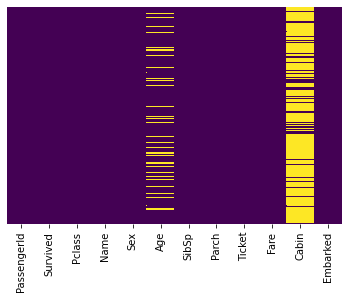

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

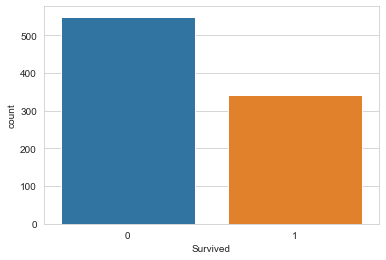

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

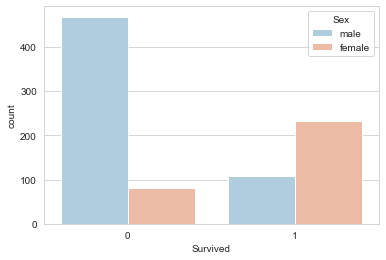

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

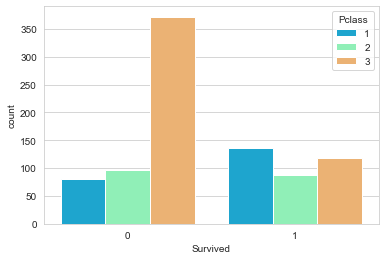

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

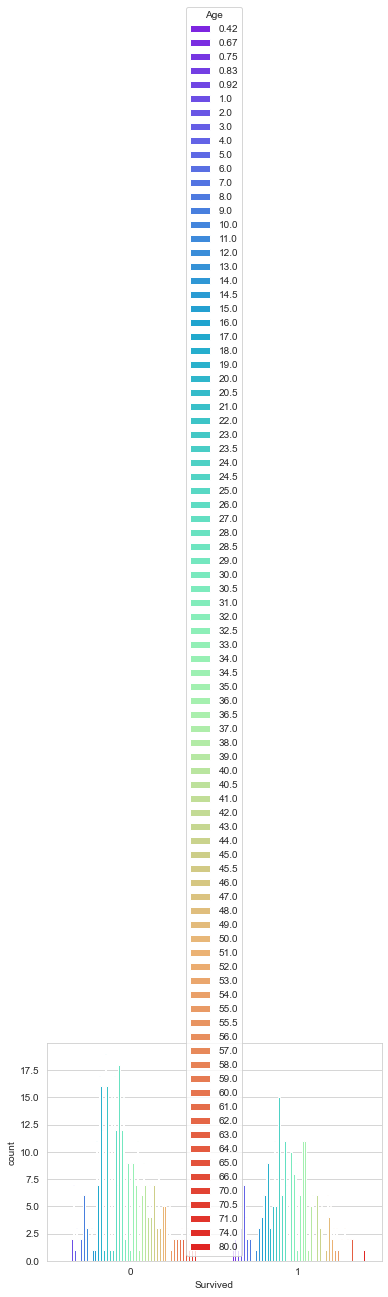

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Age',palette='rainbow')

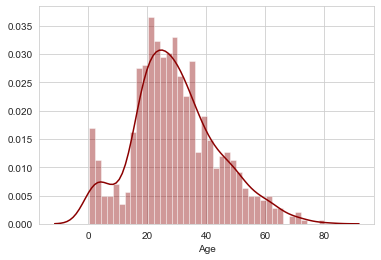

In [18]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=40)

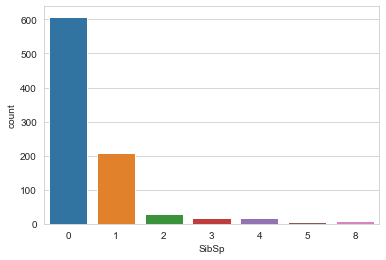

In [20]:
sns.countplot(x='SibSp',data=train)

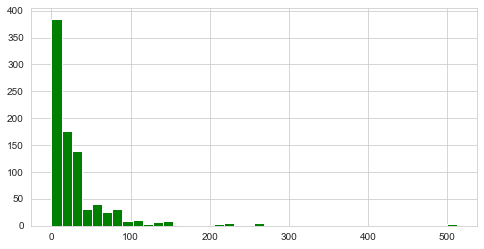

In [23]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

### Remove Null Values

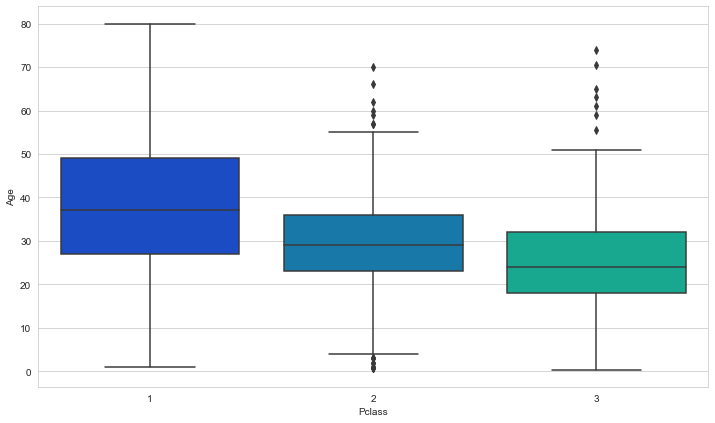

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [26]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

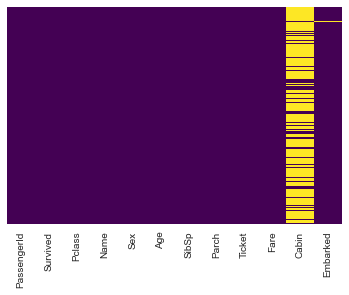

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')